# Exploratory Data Analysis II
#### This kernel is to summarize the data and decriptive statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
PATH_TO_DATA = 'data/predict_future_sales'
items = pd.read_csv(os.path.join(PATH_TO_DATA, 'items.csv'))
item_categories = pd.read_csv(os.path.join(PATH_TO_DATA, 'item_categories.csv'))
shops = pd.read_csv(os.path.join(PATH_TO_DATA, 'shops.csv'))
test = pd.read_csv(os.path.join(PATH_TO_DATA, 'test.csv'))
sample_submission = pd.read_csv(os.path.join(PATH_TO_DATA, 'sample_submission.csv'))
sales_train = pd.read_csv(os.path.join(PATH_TO_DATA, 'sales_train_v2.csv'))

In [4]:
# Our aim is to explore the train dataset
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [4]:
sales_train.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

### Looks like there is no Missing data - NaNs in our train data set

In [5]:
#lets check for duplicate values
len(sales_train[sales_train.duplicated()])

6

In [6]:
#There are 6 duplicate rows , we will keep it as of now. 
#It also could be that the same item was bought twice due to its popularity

In [6]:
sales_train[sales_train.duplicated()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


In [17]:
items[items['item_id'].isin(list(sales_train[sales_train.duplicated()]['item_id'].unique()))]

,item_name,item_id,item_category_id
3423,"Far Cry 3 (Classics) [Xbox 360, русская версия]",3423,23
20130,УЧЕНИК ЧАРОДЕЯ (регион),20130,40
21619,ЧЕЛОВЕК ДОЖДЯ (BD),21619,37


In [18]:
#These three items were bought, could be popular, so lets keep it.

In [19]:
print("Number of unique shops in train set {}.".format(sales_train["shop_id"].nunique()))
print("Number of unique items in train set {}.".format(sales_train["item_id"].nunique()))

print("Number of unique shops in test set {}.".format(test["shop_id"].nunique()))
print("Number of unique items in test set {}.".format(test["item_id"].nunique()))

Number of unique shops in train set 60.
Number of unique items in train set 21807.
Number of unique shops in test set 42.
Number of unique items in test set 5100.


#### General Observation in the given dataset

- There are 22170 items in the catalogue and 60 shops 
- The total possible number of combinations 22170*60 = 1330200 
- The train set consists of 60 unique shops and 21807 items
- The test set consists of 42 unique shops and 5100 items 


##### To keep the memory space allocated more than necessary, downcasting the datatypes to minimum requirements

In [7]:
def downcast_datatypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df
#converting float64 to float32 and int64,int32 to int16

In [8]:
sales_train = downcast_datatypes(sales_train)

In [21]:
#Saving salestrain as pickle for further processing
sales_train.to_pickle('data/sales_train_dwncast.pkl')
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int16
shop_id           int16
item_id           int16
item_price        float32
item_cnt_day      float32
dtypes: float32(2), int16(3), object(1)
memory usage: 61.6+ MB


##### Now we see that the memory usage: 134.4+ MB has come down to memory usage: 61.6+ MB

#### Lets Explore the features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c1984ef28>,
      dtype=object)

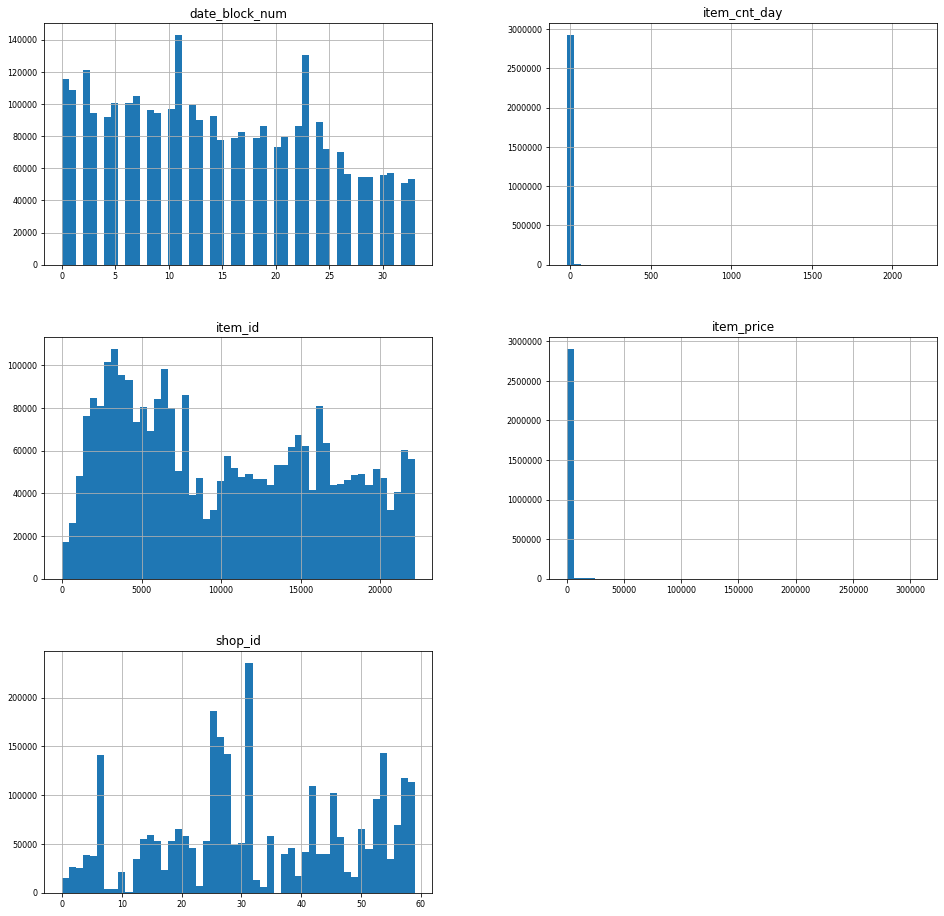

In [10]:
sales_train.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8) #freq vs features

In [11]:
#Lets check for outliers - Uni-variate outlier

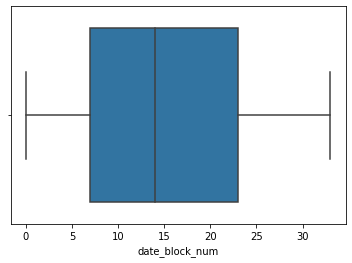

In [12]:
sns.boxplot(x=sales_train['date_block_num'])

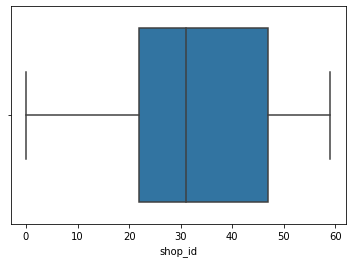

In [13]:
sns.boxplot(x=sales_train['shop_id'])

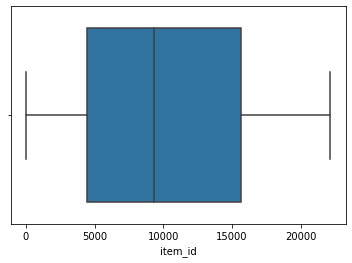

In [14]:
sns.boxplot(x=sales_train['item_id'])

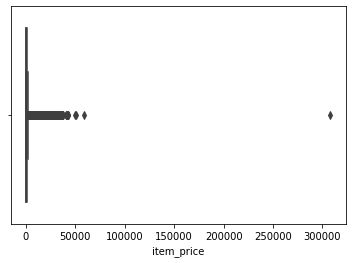

In [15]:
sns.boxplot(x=sales_train['item_price'])

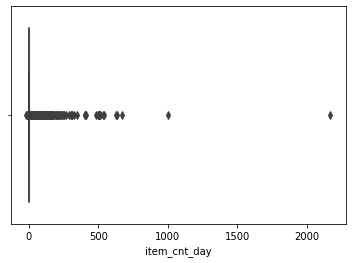

In [16]:
sns.boxplot(x=sales_train['item_cnt_day'])

In [17]:
print('Item count day outliers:',sales_train['item_id'][sales_train['item_cnt_day']>500].unique())
print('Item price outliers:',sales_train['item_id'][sales_train['item_price']>50000].unique())

Item count day outliers: [ 8057 20949  9242 19437  3731 11373  9249  9248]
Item price outliers: [11365  6066 13199]


In [18]:
sales_train['item_price'].value_counts().head(10)

299.0    291352
399.0    242603
149.0    218432
199.0    184044
349.0    101461
599.0     95673
999.0     82784
799.0     77882
249.0     77685
699.0     76493
Name: item_price, dtype: int64

In [6]:
sales_train.loc[sales_train['item_price']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [7]:
# We see a negative item price

In [8]:
sales_train[(sales_train['shop_id']==32)&(sales_train['item_id']==2973)&(sales_train['date_block_num']==4)&(sales_train['item_price']>0)].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484682,23.05.2013,4,32,2973,1249.0,1.0
484684,06.05.2013,4,32,2973,2499.0,1.0


In [9]:
# We see same item sold for different prices at the same shop in the same month !!!

In [19]:
sales_train['item_cnt_day'].value_counts().head(10)

 1.0    2629372
 2.0     194201
 3.0      47350
 4.0      19685
 5.0      10474
-1.0       7252
 6.0       6338
 7.0       4057
 8.0       2903
 9.0       2177
Name: item_cnt_day, dtype: int64

#### we see -1 in th count , could be an error in the items sold or could be that the product was returned.

CPU times: user 8.27 s, sys: 91.7 ms, total: 8.36 s
Wall time: 7.5 s


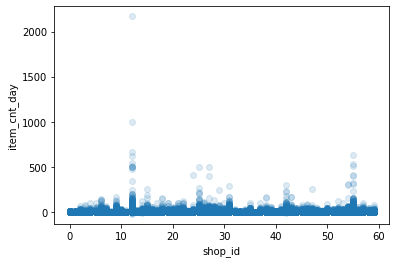

In [20]:
%%time
sns.regplot(data=sales_train,x="shop_id", y="item_cnt_day",
            fit_reg=False,scatter_kws={'alpha':0.15})

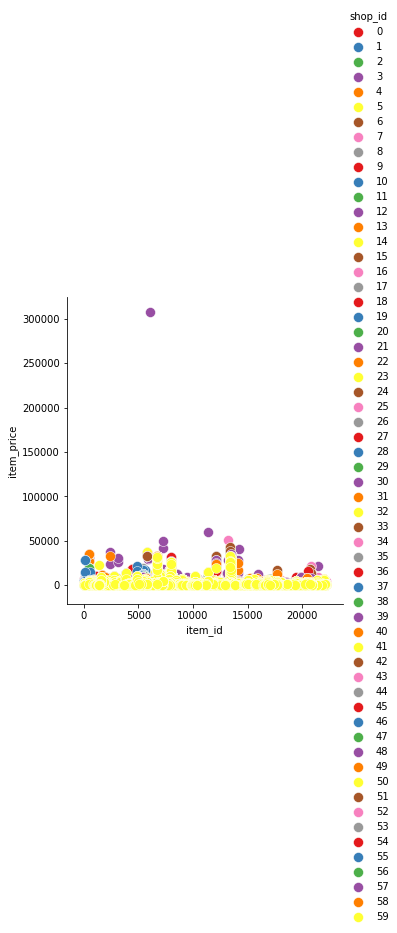

In [20]:
g = sns.FacetGrid(sales_train, hue="shop_id", palette="Set1", height=5 )
g.map(plt.scatter, "item_id", "item_price", s=100, linewidth=.5, edgecolor="white")
g.add_legend();